# MARATÓN BEHIND THE CODE 2020

# DESAFÍO 8 - Digital House

El reto de Digital House tiene que ver con la misión y visión de la empresa; la cual busca transformar la vida de las personas, desarrollando competencias digitales, para que generen un impacto positivo en la sociedad. En ese sentido, Digital House busca a través de este desafío medir la empleabilidad de los cursos que disponibiliza en su plataforma, es decir que tan factible es que un alumno o egresado de Digital House acceda al mercado laboral o consiga un trabajo en su área luego de finalizar uno o varios de los cursos ofrecidos en la plataforma.

Entender que características o variables hacen que una persona sea más o menos empleable es fundamental para la empresa y para generar ese impacto positivo que busca aportar a la sociedad

### Notebook Solución de Luis Marquez
En este notebook está mi solucion personal con todo el codigo añadido por mi junto a mis comentarios sobre la base provista por los organizadores del desafio, que para este en particular fue muy limitado.

<hr>

In [28]:
!pip install scikit-learn --upgrade
!pip install scipy --upgrade
!pip install statsmodels

Requirement already up-to-date: scikit-learn in c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages (0.23.2)

You should consider upgrading via the 'c:\users\luis marquez\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.



Requirement already up-to-date: scipy in c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages (1.5.2)


You should consider upgrading via the 'c:\users\luis marquez\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [3]:
import requests
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from collections import Counter

In [4]:
#Importamos el dataset a trabajar

#url = 'https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv'
#filename = 'train_dataset_digitalhouse.csv'
#urllib.request.urlretrieve(url, filename)
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset.tail()

,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,9995,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,9996,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,9997,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,9998,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,9999,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


## En el conjunto de datos proporcionado, tenemos las siguientes columnas:

* Unnamed: 0
* EDAD
* GENERO
* RESIDENCIA
* NV_ESTUDIO
* ESTUDIO_PREV
* TRACK_DH
* AVG_DH
* MINUTES_DH
* EXPERIENCIA
* **DIAS_EMP = El valor "target" que se va a predecir**

In [5]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8995 non-null   int64  
 1   EDAD          7668 non-null   float64
 2   GENERO        7620 non-null   object 
 3   RESIDENCIA    7638 non-null   object 
 4   NV_ESTUDIO    7623 non-null   object 
 5   ESTUDIO_PREV  7665 non-null   object 
 6   TRACK_DH      7714 non-null   object 
 7   AVG_DH        7651 non-null   float64
 8   MINUTES_DH    7619 non-null   float64
 9   EXPERIENCIA   7618 non-null   float64
 10  DIAS_EMP      8995 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 597.4+ KB


<hr>

In [6]:
df_training_dataset.columns

Index(['Unnamed: 0', 'EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA',
       'DIAS_EMP'],
      dtype='object')

In [7]:
#construyo un dataframe de prueba para hacer una serie de analisis, para estos necesito que no existan valores nulos
df_test = df_training_dataset.dropna(inplace= False)
x = df_test[['Unnamed: 0', 'EDAD', 'GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA']]
y = df_test['DIAS_EMP']
x = pd.get_dummies(x, columns=['GENERO', 'RESIDENCIA', 'NV_ESTUDIO',
       'ESTUDIO_PREV', 'TRACK_DH'])
x.head()

,Unnamed: 0,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,GENERO_FEMENINO,GENERO_MASCULINO,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,...,NV_ESTUDIO_UNIVERSITARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_COMMERCIAL,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION
12,1012,44.0,3.3,4469.9,28.9,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
16,1016,34.0,3.8,4696.3,15.2,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
17,1017,20.0,3.0,3914.3,0.6,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
20,1020,35.0,3.6,4682.6,18.1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
27,1027,31.0,3.3,4419.9,12.3,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


Feature: 0, Score: 0.14382
Feature: 1, Score: 0.01088
Feature: 2, Score: 0.02618
Feature: 3, Score: 0.07900
Feature: 4, Score: 0.33251
Feature: 5, Score: 0.32388
Feature: 6, Score: 0.00227
Feature: 7, Score: 0.00202
Feature: 8, Score: 0.00191
Feature: 9, Score: 0.00105
Feature: 10, Score: 0.03906
Feature: 11, Score: 0.00099
Feature: 12, Score: 0.00524
Feature: 13, Score: 0.00240
Feature: 14, Score: 0.00267
Feature: 15, Score: 0.01383
Feature: 16, Score: 0.00490
Feature: 17, Score: 0.00217
Feature: 18, Score: 0.00174
Feature: 19, Score: 0.00120
Feature: 20, Score: 0.00229


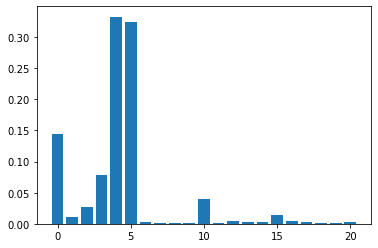

In [8]:
#un modelo de regresion para obtener los feature importance y tener una idea de que columnas estan aportando mas al modelo
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(oob_score = True,n_estimators=300, bootstrap = True, random_state = 42 )
#fit the model
x.drop(columns=['Unnamed: 0'],inplace=True)
model.fit(x,y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [9]:
x.columns

Index(['EDAD', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA', 'GENERO_FEMENINO',
       'GENERO_MASCULINO', 'RESIDENCIA_ARGENTINA', 'RESIDENCIA_BRAZIL',
       'RESIDENCIA_MEXICO', 'NV_ESTUDIO_POST_GRADUATE', 'NV_ESTUDIO_TERTIARY',
       'NV_ESTUDIO_UNIVERSITARY', 'ESTUDIO_PREV_BUSINESS',
       'ESTUDIO_PREV_COMMERCIAL', 'ESTUDIO_PREV_DEVELOPMENT',
       'ESTUDIO_PREV_ENGINEERING', 'ESTUDIO_PREV_MARKETING', 'TRACK_DH_DATA',
       'TRACK_DH_EJECUTIVO', 'TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'],
      dtype='object')

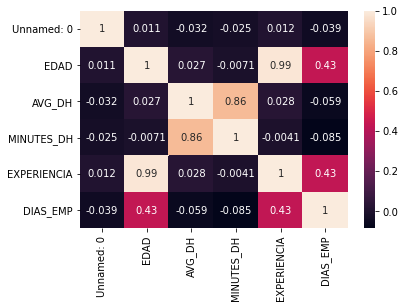

In [11]:
#esta es una matriz de correlación que muestra el coeficiente de correlacion lineal entre las columnas del df_test
import seaborn as sn
corrMatrix = df_test.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

este coeficiente representa el grado de correlacion lineal entre los datos mientras mas cercano a 1 o -1 la correlacion es mayor creciente o decreciente. y al rededor de 0 no hay correlacion.

de la matriz podemos observar que las columnas edad y experiencia estan muy relacionadas, al igual que las columnas AVG_DH y MINUTES_DH. por lo que entre ellas se puede obetener mayor informacion.

Por otra parte en un modelo de regresion lineal es importante que los features ingresados al modelo no tengan correlacion entre ellos ya que al ser redundantes pueden generar problemas para que el modelo calcule efectivamente los resultados

<ipython-input-13-f7e384fe2b6d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_experiencia = RandomForestRegressor(oob_score = True,n_estimators=100, bootstrap = True, random_state = 42 ).fit(edad,experiencia)


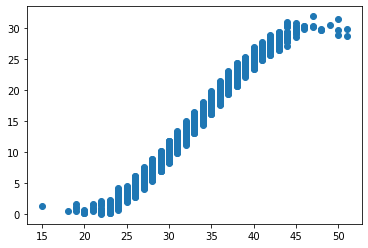

In [13]:
# Creo un modelo de regresion entre edad y experiencia ya que se que estan muy correlacionados
#de esta manera puedo calcular experiencia en funcion de la edad
edad = np.array(x['EDAD']).reshape(-1,1)
experiencia = np.array(x['EXPERIENCIA']).reshape(-1,1)
modelo_experiencia = RandomForestRegressor(oob_score = True,n_estimators=100, bootstrap = True, random_state = 42 ).fit(edad,experiencia)
pred=modelo_experiencia.predict(edad)
plt.scatter(edad,experiencia)

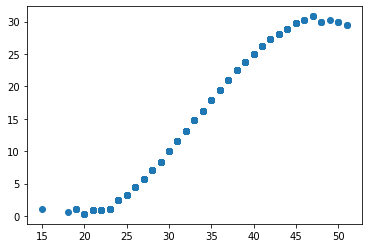

In [16]:
#se puede observar como al graficar tanto las columnas reales como la calculada con el modelo obtenemos datos muy cercanos
plt.scatter(edad,pred)

In [14]:
#de igual forma otro modelo, en este caso la edad en funcion de la experiencia
edad = np.array(x['EDAD']).reshape(-1,1)
experiencia = np.array(x['EXPERIENCIA']).reshape(-1,1)
modelo_edad = RandomForestRegressor(oob_score = True,n_estimators=100, bootstrap = True, random_state = 42 ).fit(experiencia,edad)

#y en este otro el AVG_DH en funcion de MINUTES_DH
avg = np.array(x['AVG_DH']).reshape(-1,1)
minutes = np.array(x['MINUTES_DH']).reshape(-1,1)
modelo_avg = RandomForestRegressor(oob_score = True,n_estimators=100, bootstrap = True, random_state = 42 ).fit(minutes,avg)

<ipython-input-14-594c037c8b3d>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_edad = RandomForestRegressor(oob_score = True,n_estimators=100, bootstrap = True, random_state = 42 ).fit(experiencia,edad)
<ipython-input-14-594c037c8b3d>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_avg = RandomForestRegressor(oob_score = True,n_estimators=100, bootstrap = True, random_state = 42 ).fit(minutes,avg)


<ipython-input-15-678252aa3bd3>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_minutes = RandomForestRegressor(oob_score = True,n_estimators=100, bootstrap = True, random_state = 42 ).fit(avg,minutes)


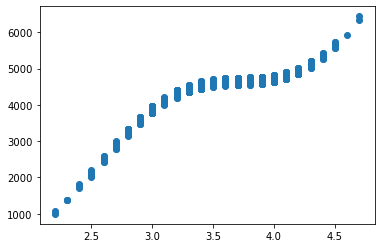

In [15]:
#En este caso, modelo para los MINUTES_DH en funcion de AVG_DH
avg = np.array(x['AVG_DH']).reshape(-1,1)
minutes = np.array(x['MINUTES_DH']).reshape(-1,1)
modelo_minutes = RandomForestRegressor(oob_score = True,n_estimators=100, bootstrap = True, random_state = 42 ).fit(avg,minutes)
pred2=modelo_minutes.predict(avg)
plt.scatter(avg,minutes)

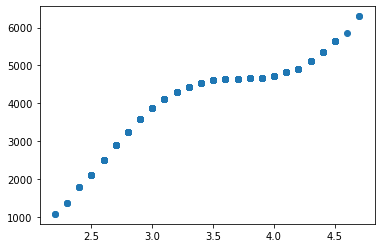

In [17]:
plt.scatter(avg,pred2)

<AxesSubplot:>

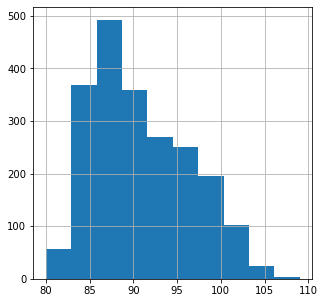

In [18]:
#observamos la distribucion de la variable de salida
y.hist(figsize=(5,5))

In [19]:
x.columns

Index(['EDAD', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA', 'GENERO_FEMENINO',
       'GENERO_MASCULINO', 'RESIDENCIA_ARGENTINA', 'RESIDENCIA_BRAZIL',
       'RESIDENCIA_MEXICO', 'NV_ESTUDIO_POST_GRADUATE', 'NV_ESTUDIO_TERTIARY',
       'NV_ESTUDIO_UNIVERSITARY', 'ESTUDIO_PREV_BUSINESS',
       'ESTUDIO_PREV_COMMERCIAL', 'ESTUDIO_PREV_DEVELOPMENT',
       'ESTUDIO_PREV_ENGINEERING', 'ESTUDIO_PREV_MARKETING', 'TRACK_DH_DATA',
       'TRACK_DH_EJECUTIVO', 'TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'],
      dtype='object')

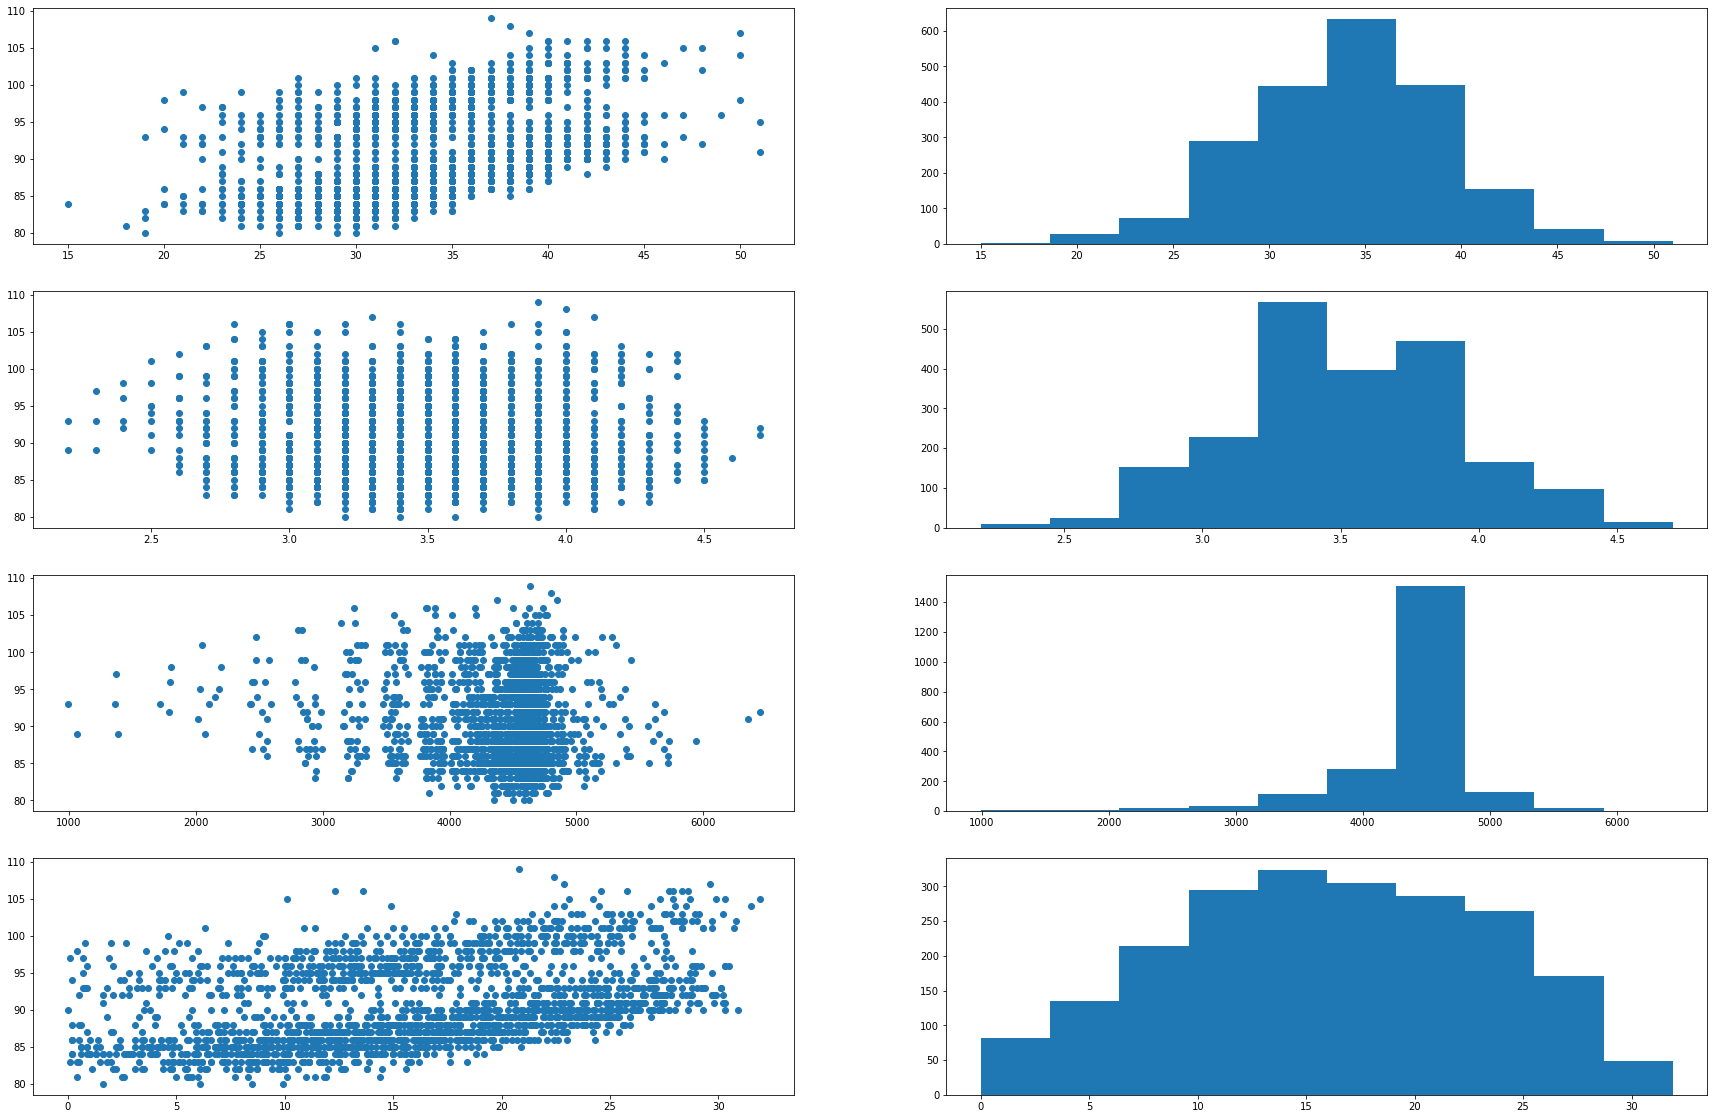

In [20]:
#en esta serie de graficos tenemos un scatter de edad, avg_dh, minutes_dh y experiencia contra y que es la variable objetivo
#y a un lado un histograma de cada una de estas features
fig, axs = plt.subplots(4, 2,figsize=(30,20))
axs[0,0].scatter(x['EDAD'], y)
axs[0,1].hist(x['EDAD'])
axs[1,0].scatter(x['AVG_DH'],y)
axs[1,1].hist(x['AVG_DH'])
axs[2,0].scatter(x['MINUTES_DH'], y)
axs[2,1].hist(x['MINUTES_DH'])
axs[3,0].scatter(x['EXPERIENCIA'], y)
axs[3,1].hist(x['EXPERIENCIA'])

plt.show()


De las graficas de arriba puedo observar como en los cuatro casos, aunque mucho mas notorio en el primero y ultimo que serian edad y experiencia, los datos se separan en dos franjas, dando la sensasion de que son dos distribuciones separadas, con la misma tendencia lineal pero desplazadas en un cierto grado. dada mi interpretacion de esto, concluyo que debe ser a causa de la columna genero. es decir, que si separo los estas columnas basado en su valor en 'GENERO' podria obtener estos dos conjuntos por separado y asi mejorar la precision del modelo.

In [21]:
x['EXPERIENCIA_FEMENINO']= np.where(x['GENERO_FEMENINO']==1, x['EXPERIENCIA'], 0)
x['EXPERIENCIA_MASCULINO']= np.where(x['GENERO_FEMENINO']==0, x['EXPERIENCIA'], 0) 
x['EDAD_FEMENINO']= np.where(x['GENERO_FEMENINO']==1, x['EDAD'], 0)
x['EDAD_MASCULINO']= np.where(x['GENERO_FEMENINO']==0, x['EDAD'], 0)
x.head()

,EDAD,AVG_DH,MINUTES_DH,EXPERIENCIA,GENERO_FEMENINO,GENERO_MASCULINO,RESIDENCIA_ARGENTINA,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_POST_GRADUATE,...,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION,EXPERIENCIA_FEMENINO,EXPERIENCIA_MASCULINO,EDAD_FEMENINO,EDAD_MASCULINO
12,44.0,3.3,4469.9,28.9,0,1,1,0,0,0,...,1,0,0,1,0,0,0.0,28.9,0.0,44.0
16,34.0,3.8,4696.3,15.2,0,1,0,1,0,0,...,0,0,0,0,0,1,0.0,15.2,0.0,34.0
17,20.0,3.0,3914.3,0.6,0,1,1,0,0,1,...,0,0,1,0,0,0,0.0,0.6,0.0,20.0
20,35.0,3.6,4682.6,18.1,0,1,1,0,0,1,...,0,0,0,1,0,0,0.0,18.1,0.0,35.0
27,31.0,3.3,4419.9,12.3,1,0,1,0,0,0,...,1,0,0,0,0,1,12.3,0.0,31.0,0.0


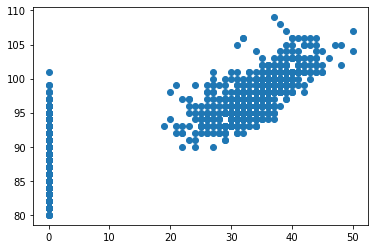

In [22]:
plt.scatter(x['EDAD_FEMENINO'], y)

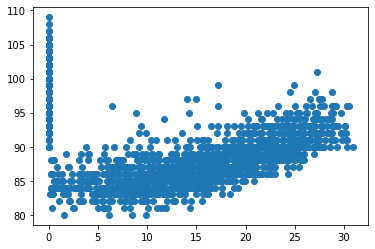

In [23]:
plt.scatter(x['EXPERIENCIA_MASCULINO'], y)

Ahora podemos observar como al separar las columnas en femenino y masculino obtenemos una tendencia mucho mas marcada, lo cual puede ayudar nuestro modelo a mejorar su precisión

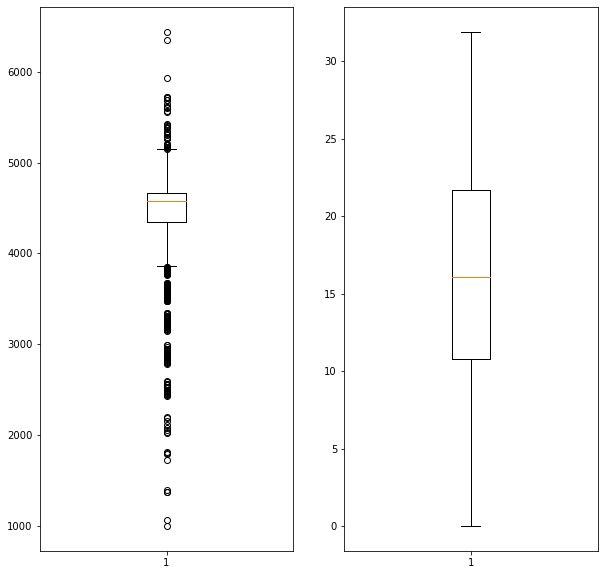

In [24]:
#ahora una grafica para ver si existen outliers
fig, axs = plt.subplots(1, 2,figsize=(10,10))

axs[0].boxplot(x['MINUTES_DH'])
axs[1].boxplot(x['EXPERIENCIA'])
plt.show()

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DIAS_EMP'>

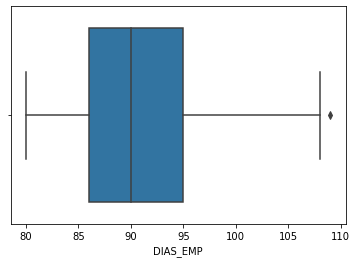

In [25]:
sns.boxplot(y)

## Ahora que hemops obtenido algunas conclusiones del analisis previo empezamos a trabajar sobre el dataframe con el que haremos el modelo de regresion

In [29]:
df_training_dataset.head()

,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
0,1000,37.0,FEMENINO,BRAZIL,UNIVERSITARY,NaN,PROGRAMACION,3.1,4131.5,21.3,97.0
1,1001,40.0,FEMENINO,NaN,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.1,4160.4,25.2,102.0
2,1002,35.0,NaN,ARGENTINA,UNIVERSITARY,DEVELOPMENT,DATA,3.1,4087.6,18.0,89.0
3,1003,33.0,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,NaN,3.1,4043.2,13.6,96.0
4,1004,29.0,NaN,BRAZIL,UNIVERSITARY,DEVELOPMENT,NaN,3.6,4688.0,NaN,83.0


In [30]:
Counter(df_training_dataset['GENERO'])

Counter({'FEMENINO': 2390, nan: 1375, 'MASCULINO': 5230})

In [34]:
print("Valores nulos del df_training_dataset: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))
print(df_training_dataset.shape)
print(df_training_dataset.nunique())

Valores nulos del df_training_dataset: 

Unnamed: 0         0
EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH      1376
EXPERIENCIA     1377
DIAS_EMP           0
dtype: int64

(8995, 11)
Unnamed: 0      8995
EDAD              37
GENERO             2
RESIDENCIA         3
NV_ESTUDIO         3
ESTUDIO_PREV       5
TRACK_DH           4
AVG_DH            29
MINUTES_DH      5109
EXPERIENCIA      318
DIAS_EMP          34
dtype: int64


In [32]:
#eliminamos la columna 'Unnamed: 0' que no aporta nada
df_training_dataset_1 = df_training_dataset.drop(columns=['Unnamed: 0'], inplace=False)
df_training_dataset_1.tail()

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


### Removendo valores NaN

In [33]:
print("Valores nulos del df_training_dataset : \n\n{}\n".format(df_training_dataset_1.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset : 

EDAD            1327
GENERO          1375
RESIDENCIA      1357
NV_ESTUDIO      1372
ESTUDIO_PREV    1330
TRACK_DH        1281
AVG_DH          1344
MINUTES_DH      1376
EXPERIENCIA     1377
DIAS_EMP           0
dtype: int64



In [52]:
#para empezar, segun nuestro analisis la columns genero es escencial para dividir el resto de columnas, asi que eliminamos los Nulos que existen en ella
df_training_dataset_2 = df_training_dataset_1.dropna(axis='index', how='any', subset=['GENERO'], inplace=False)
print(df_training_dataset_1.shape)
print(df_training_dataset_2.shape)
print("Valores nulos del df_training_dataset_2 : \n\n{}\n".format(df_training_dataset_2.isnull().sum(axis = 0)))


(8995, 10)
(7620, 10)
Valores nulos del df_training_dataset_2 : 

EDAD            1126
GENERO             0
RESIDENCIA      1136
NV_ESTUDIO      1165
ESTUDIO_PREV    1123
TRACK_DH        1081
AVG_DH          1128
MINUTES_DH      1180
EXPERIENCIA     1160
DIAS_EMP           0
dtype: int64



Construí el codigo siguiente para iterar sobre las columnas, verificando la existencia de valores nulos, y donde los encuentre ejecutar el calculo de ese valor nulo utilizando los modelos de regresion que hice anteriormente, de esta forma en vez de reemplazar los nulos con la media, o con ceros, los reemplazo con un valor calculado a partir de un modelo de regresion que se que tiene alta confiabilidad debido a la alta correlacion lineal. Por otro lado si ocurre que en ambos valores se encuentre NUll, el codigo ejecuta el llenado de esa celda con la media de la columna correspondiente de manera de no alterar mucho los resultados. A continuacion estan las celdas corriendo ese codigo para cada columna

In [53]:

for i in df_training_dataset_2.itertuples():
    
    if pd.isnull(df_training_dataset_2.loc[i[0],'EXPERIENCIA']):
        try:
            df_training_dataset_2.loc[i[0],'EXPERIENCIA'] = modelo_experiencia.predict(df_training_dataset_2.loc[i[0],'EDAD'])
        except:
            df_training_dataset_2.loc[i[0],'EXPERIENCIA'] = df_training_dataset_2['EXPERIENCIA'].mean()


c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

In [54]:
for i in df_training_dataset_2.itertuples():
    if pd.isnull(df_training_dataset_2.loc[i[0],'MINUTES_DH']):
        try:
            df_training_dataset_2.loc[i[0],'MINUTES_DH'] = modelo_experiencia.predict(df_training_dataset_2.loc[i[0],'AVG_DH'])
        except:
            df_training_dataset_2.loc[i[0],'MINUTES_DH'] = df_training_dataset_2['MINUTES_DH'].mean()
    


c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

In [55]:
for i in df_training_dataset_2.itertuples():
    if pd.isnull(df_training_dataset_2.loc[i[0],'EDAD']):
        try:
            df_training_dataset_2.loc[i[0],'EDAD'] = modelo_experiencia.predict(df_training_dataset_2.loc[i[0],'EXPERIENCIA'])
        except:
            df_training_dataset_2.loc[i[0],'EDAD'] = df_training_dataset_2['EDAD'].mean()

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

In [56]:
for i in df_training_dataset_2.itertuples():
    if pd.isnull(df_training_dataset_2.loc[i[0],'AVG_DH']):
        try:
            df_training_dataset_2.loc[i[0],'AVG_DH'] = modelo_experiencia.predict(df_training_dataset_2.loc[i[0],'MINUTES_DH'])
        except:
            df_training_dataset_2.loc[i[0],'AVG_DH'] = df_training_dataset_2['AVG_DH'].mean()

            
print("Valores nulos del df_training_dataset_2 : \n\n{}\n".format(df_training_dataset_2.isnull().sum(axis = 0)))


c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

Valores nulos del df_training_dataset_2 : 

EDAD               0
GENERO             0
RESIDENCIA      1136
NV_ESTUDIO      1165
ESTUDIO_PREV    1123
TRACK_DH        1081
AVG_DH             0
MINUTES_DH         0
EXPERIENCIA        0
DIAS_EMP           0
dtype: int64



c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
c:\users\luis marquez\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying t

Ahora ya tenemos las columnas de AVG_DH, MINUTES_DH, EXPERIENCIA, DIAS_EMP sin valores nulos, asi que sobre la siguiente celda voy a dividirlas segun su valor en 'GENERO'

In [57]:
df_training_dataset_2['EXPERIENCIA_FEMENINO']= np.where(df_training_dataset_2['GENERO']=='FEMENINO', df_training_dataset_2['EXPERIENCIA'], 0)
df_training_dataset_2['EXPERIENCIA_MASCULINO']= np.where(df_training_dataset_2['GENERO']=='MASCULINO', df_training_dataset_2['EXPERIENCIA'], 0) 
df_training_dataset_2['MINUTES_DH_MASCULINO']= np.where(df_training_dataset_2['GENERO']=='MASCULINO', df_training_dataset_2['MINUTES_DH'], 0)
df_training_dataset_2['MINUTES_DH_FEMENINO']= np.where(df_training_dataset_2['GENERO']=='FEMENINO', df_training_dataset_2['MINUTES_DH'], 0)
df_training_dataset_2['EDAD_FEMENINO']= np.where(df_training_dataset_2['GENERO']=='FEMENINO', df_training_dataset_2['EDAD'], 0)
df_training_dataset_2['EDAD_MASCULINO']= np.where(df_training_dataset_2['GENERO']=='MASCULINO', df_training_dataset_2['EDAD'], 0) 
df_training_dataset_2['AVG_DH_MASCULINO']= np.where(df_training_dataset_2['GENERO']=='MASCULINO', df_training_dataset_2['MINUTES_DH'], 0)
df_training_dataset_2['AVG_DH_FEMENINO']= np.where(df_training_dataset_2['GENERO']=='FEMENINO', df_training_dataset_2['MINUTES_DH'], 0)
df_training_dataset_2.head()

<ipython-input-57-685ac963dd2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training_dataset_2['EXPERIENCIA_FEMENINO']= np.where(df_training_dataset_2['GENERO']=='FEMENINO', df_training_dataset_2['EXPERIENCIA'], 0)
<ipython-input-57-685ac963dd2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_training_dataset_2['EXPERIENCIA_MASCULINO']= np.where(df_training_dataset_2['GENERO']=='MASCULINO', df_training_dataset_2['EXPERIENCIA'], 0)
<ipython-input-57-685ac963dd2c>:3: SettingWithCopyWarning: 
A va

,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP,EXPERIENCIA_FEMENINO,EXPERIENCIA_MASCULINO,MINUTES_DH_MASCULINO,MINUTES_DH_FEMENINO,EDAD_FEMENINO,EDAD_MASCULINO,AVG_DH_MASCULINO,AVG_DH_FEMENINO
0,37.0,FEMENINO,BRAZIL,UNIVERSITARY,NaN,PROGRAMACION,3.100000,4131.500000,21.3,97.0,21.3,0.0,0.000000,4131.5,37.0,0.0,0.000000,4131.5
1,40.0,FEMENINO,NaN,UNIVERSITARY,COMMERCIAL,PROGRAMACION,3.100000,4160.400000,25.2,102.0,25.2,0.0,0.000000,4160.4,40.0,0.0,0.000000,4160.4
3,33.0,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,NaN,3.100000,4043.200000,13.6,96.0,13.6,0.0,0.000000,4043.2,33.0,0.0,0.000000,4043.2
5,28.0,FEMENINO,ARGENTINA,UNIVERSITARY,MARKETING,DATA,3.501879,4369.300000,7.0,101.0,7.0,0.0,0.000000,4369.3,28.0,0.0,0.000000,4369.3
6,35.0,MASCULINO,ARGENTINA,NaN,ENGINEERING,DATA,3.000000,4420.506149,18.0,86.0,0.0,18.0,4420.506149,0.0,0.0,35.0,4420.506149,0.0


In [58]:
print("Valores nulos del df_training_dataset : \n\n{}\n".format(df_training_dataset_2.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset : 

EDAD                        0
GENERO                      0
RESIDENCIA               1136
NV_ESTUDIO               1165
ESTUDIO_PREV             1123
TRACK_DH                 1081
AVG_DH                      0
MINUTES_DH                  0
EXPERIENCIA                 0
DIAS_EMP                    0
EXPERIENCIA_FEMENINO        0
EXPERIENCIA_MASCULINO       0
MINUTES_DH_MASCULINO        0
MINUTES_DH_FEMENINO         0
EDAD_FEMENINO               0
EDAD_MASCULINO              0
AVG_DH_MASCULINO            0
AVG_DH_FEMENINO             0
dtype: int64



In [59]:
#Eliminamos las columnas redundantes 
df_training_dataset_2 = df_training_dataset_2.drop(columns=['EDAD', 'AVG_DH', 'MINUTES_DH', 'EXPERIENCIA'])


In [60]:
#Corremos un simpleimputer sobre el dataframe para reemplazar los nulos que quedan en el resto de columnas por el valor mas frecuente en cada una de ellas
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy='most_frequent', copy=True)
df_training_dataset_3 = pd.DataFrame.from_records(data=si.fit_transform( X=df_training_dataset_2 ),  columns=df_training_dataset_2.columns)
df_training_dataset_3.head()

,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,DIAS_EMP,EXPERIENCIA_FEMENINO,EXPERIENCIA_MASCULINO,MINUTES_DH_MASCULINO,MINUTES_DH_FEMENINO,EDAD_FEMENINO,EDAD_MASCULINO,AVG_DH_MASCULINO,AVG_DH_FEMENINO
0,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,PROGRAMACION,97.0,21.3,0.0,0.000000,4131.5,37.0,0.0,0.000000,4131.5
1,FEMENINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,PROGRAMACION,102.0,25.2,0.0,0.000000,4160.4,40.0,0.0,0.000000,4160.4
2,FEMENINO,BRAZIL,UNIVERSITARY,ENGINEERING,DATA,96.0,13.6,0.0,0.000000,4043.2,33.0,0.0,0.000000,4043.2
3,FEMENINO,ARGENTINA,UNIVERSITARY,MARKETING,DATA,101.0,7.0,0.0,0.000000,4369.3,28.0,0.0,0.000000,4369.3
4,MASCULINO,ARGENTINA,UNIVERSITARY,ENGINEERING,DATA,86.0,0.0,18.0,4420.506149,0.0,0.0,35.0,4420.506149,0.0


### Codificando variables categóricas

In [61]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies`` (demontración)
df_training_dataset_4 = pd.get_dummies(df_training_dataset_3, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','ESTUDIO_PREV','TRACK_DH'])
df_training_dataset_4.tail()

,DIAS_EMP,EXPERIENCIA_FEMENINO,EXPERIENCIA_MASCULINO,MINUTES_DH_MASCULINO,MINUTES_DH_FEMENINO,EDAD_FEMENINO,EDAD_MASCULINO,AVG_DH_MASCULINO,AVG_DH_FEMENINO,GENERO_FEMENINO,...,NV_ESTUDIO_UNIVERSITARY,ESTUDIO_PREV_BUSINESS,ESTUDIO_PREV_COMMERCIAL,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_DATA,TRACK_DH_EJECUTIVO,TRACK_DH_MARKETING,TRACK_DH_PROGRAMACION
7615,86.0,0.0,20.9,4420.506149,0.0,0.0,36.0,4420.506149,0.0,0,...,1,0,1,0,0,0,1,0,0,0
7616,86.0,0.0,9.1,4701.600000,0.0,0.0,29.0,4701.600000,0.0,0,...,0,0,0,1,0,0,1,0,0,0
7617,95.0,5.6,0.0,0.000000,3315.1,28.0,0.0,0.000000,3315.1,1,...,0,0,0,0,1,0,0,1,0,0
7618,87.0,0.0,0.9,4437.800000,0.0,0.0,23.0,4437.800000,0.0,0,...,0,0,0,0,1,0,0,0,0,1
7619,88.0,0.0,19.6,4600.800000,0.0,0.0,36.0,4600.800000,0.0,0,...,1,0,1,0,0,0,1,0,0,0


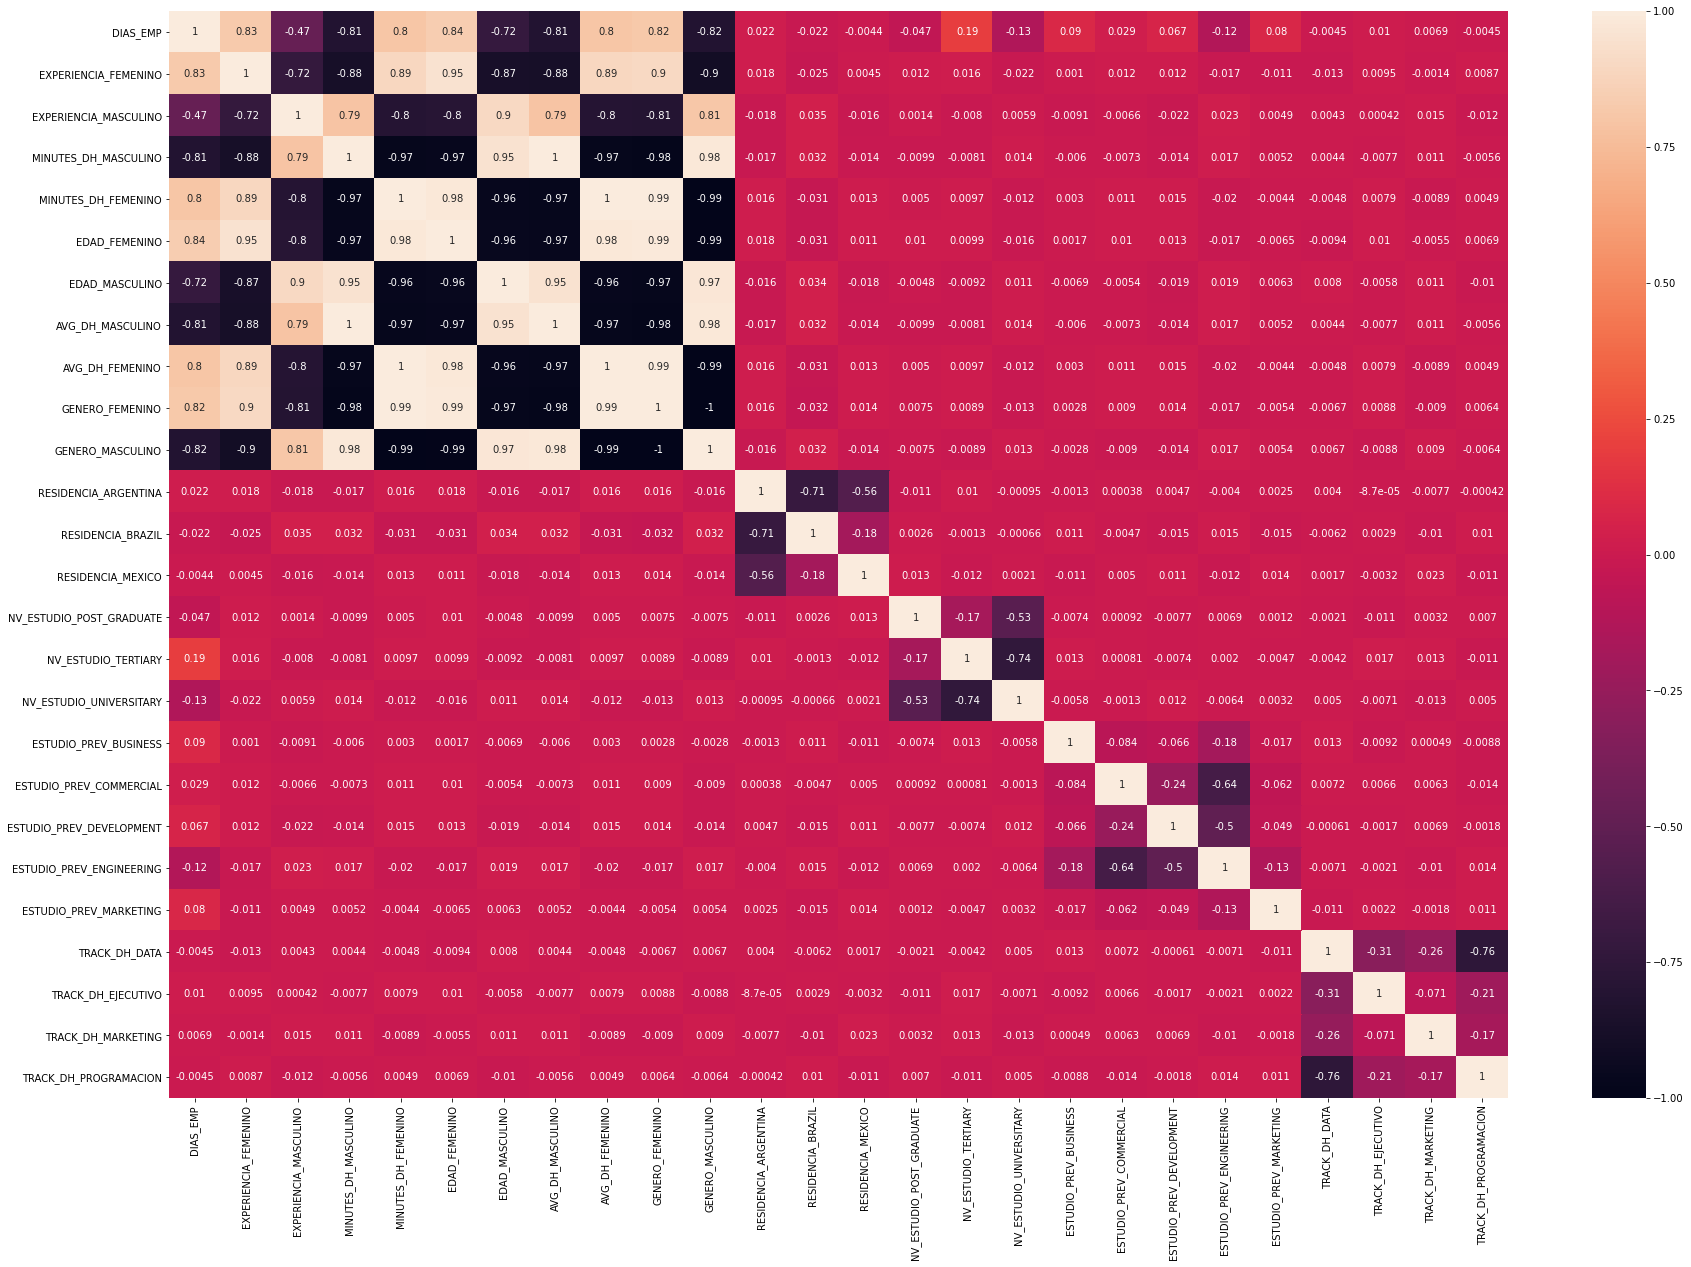

In [62]:
#Ahora una matriz de correlacion lineal para las columnas que tenemos de manera de observar que tanta correlacion puede haber entre ellas y poder eliminar algunas para no redundar en el modelo
corrMatrix2 = df_training_dataset_4.corr()
fig, ax = plt.subplots(figsize=(30,20))
sn.heatmap(corrMatrix2, annot=True)
plt.show()

In [63]:
df_training_dataset_4.columns

Index(['DIAS_EMP', 'EXPERIENCIA_FEMENINO', 'EXPERIENCIA_MASCULINO',
       'MINUTES_DH_MASCULINO', 'MINUTES_DH_FEMENINO', 'EDAD_FEMENINO',
       'EDAD_MASCULINO', 'AVG_DH_MASCULINO', 'AVG_DH_FEMENINO',
       'GENERO_FEMENINO', 'GENERO_MASCULINO', 'RESIDENCIA_ARGENTINA',
       'RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 'NV_ESTUDIO_POST_GRADUATE',
       'NV_ESTUDIO_TERTIARY', 'NV_ESTUDIO_UNIVERSITARY',
       'ESTUDIO_PREV_BUSINESS', 'ESTUDIO_PREV_COMMERCIAL',
       'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
       'ESTUDIO_PREV_MARKETING', 'TRACK_DH_DATA', 'TRACK_DH_EJECUTIVO',
       'TRACK_DH_MARKETING', 'TRACK_DH_PROGRAMACION'],
      dtype='object')

In [64]:
#eliminamos algunas columnas que presentan una alta correlacion
df_training_dataset_5 = df_training_dataset_4.drop(columns=['GENERO_MASCULINO','RESIDENCIA_ARGENTINA',
                                                            'NV_ESTUDIO_POST_GRADUATE','NV_ESTUDIO_UNIVERSITARY',
                                                            'ESTUDIO_PREV_BUSINESS','ESTUDIO_PREV_COMMERCIAL',
                                                            'TRACK_DH_DATA','TRACK_DH_MARKETING',
                                                            
                                                           ], inplace=False)
df_training_dataset_5.tail()

,DIAS_EMP,EXPERIENCIA_FEMENINO,EXPERIENCIA_MASCULINO,MINUTES_DH_MASCULINO,MINUTES_DH_FEMENINO,EDAD_FEMENINO,EDAD_MASCULINO,AVG_DH_MASCULINO,AVG_DH_FEMENINO,GENERO_FEMENINO,RESIDENCIA_BRAZIL,RESIDENCIA_MEXICO,NV_ESTUDIO_TERTIARY,ESTUDIO_PREV_DEVELOPMENT,ESTUDIO_PREV_ENGINEERING,ESTUDIO_PREV_MARKETING,TRACK_DH_EJECUTIVO,TRACK_DH_PROGRAMACION
7615,86.0,0.0,20.9,4420.506149,0.0,0.0,36.0,4420.506149,0.0,0,0,0,0,0,0,0,0,0
7616,86.0,0.0,9.1,4701.600000,0.0,0.0,29.0,4701.600000,0.0,0,0,0,1,1,0,0,0,0
7617,95.0,5.6,0.0,0.000000,3315.1,28.0,0.0,0.000000,3315.1,1,0,0,0,0,1,0,1,0
7618,87.0,0.0,0.9,4437.800000,0.0,0.0,23.0,4437.800000,0.0,0,0,1,1,0,1,0,0,1
7619,88.0,0.0,19.6,4600.800000,0.0,0.0,36.0,4600.800000,0.0,0,0,0,0,0,0,0,0,0


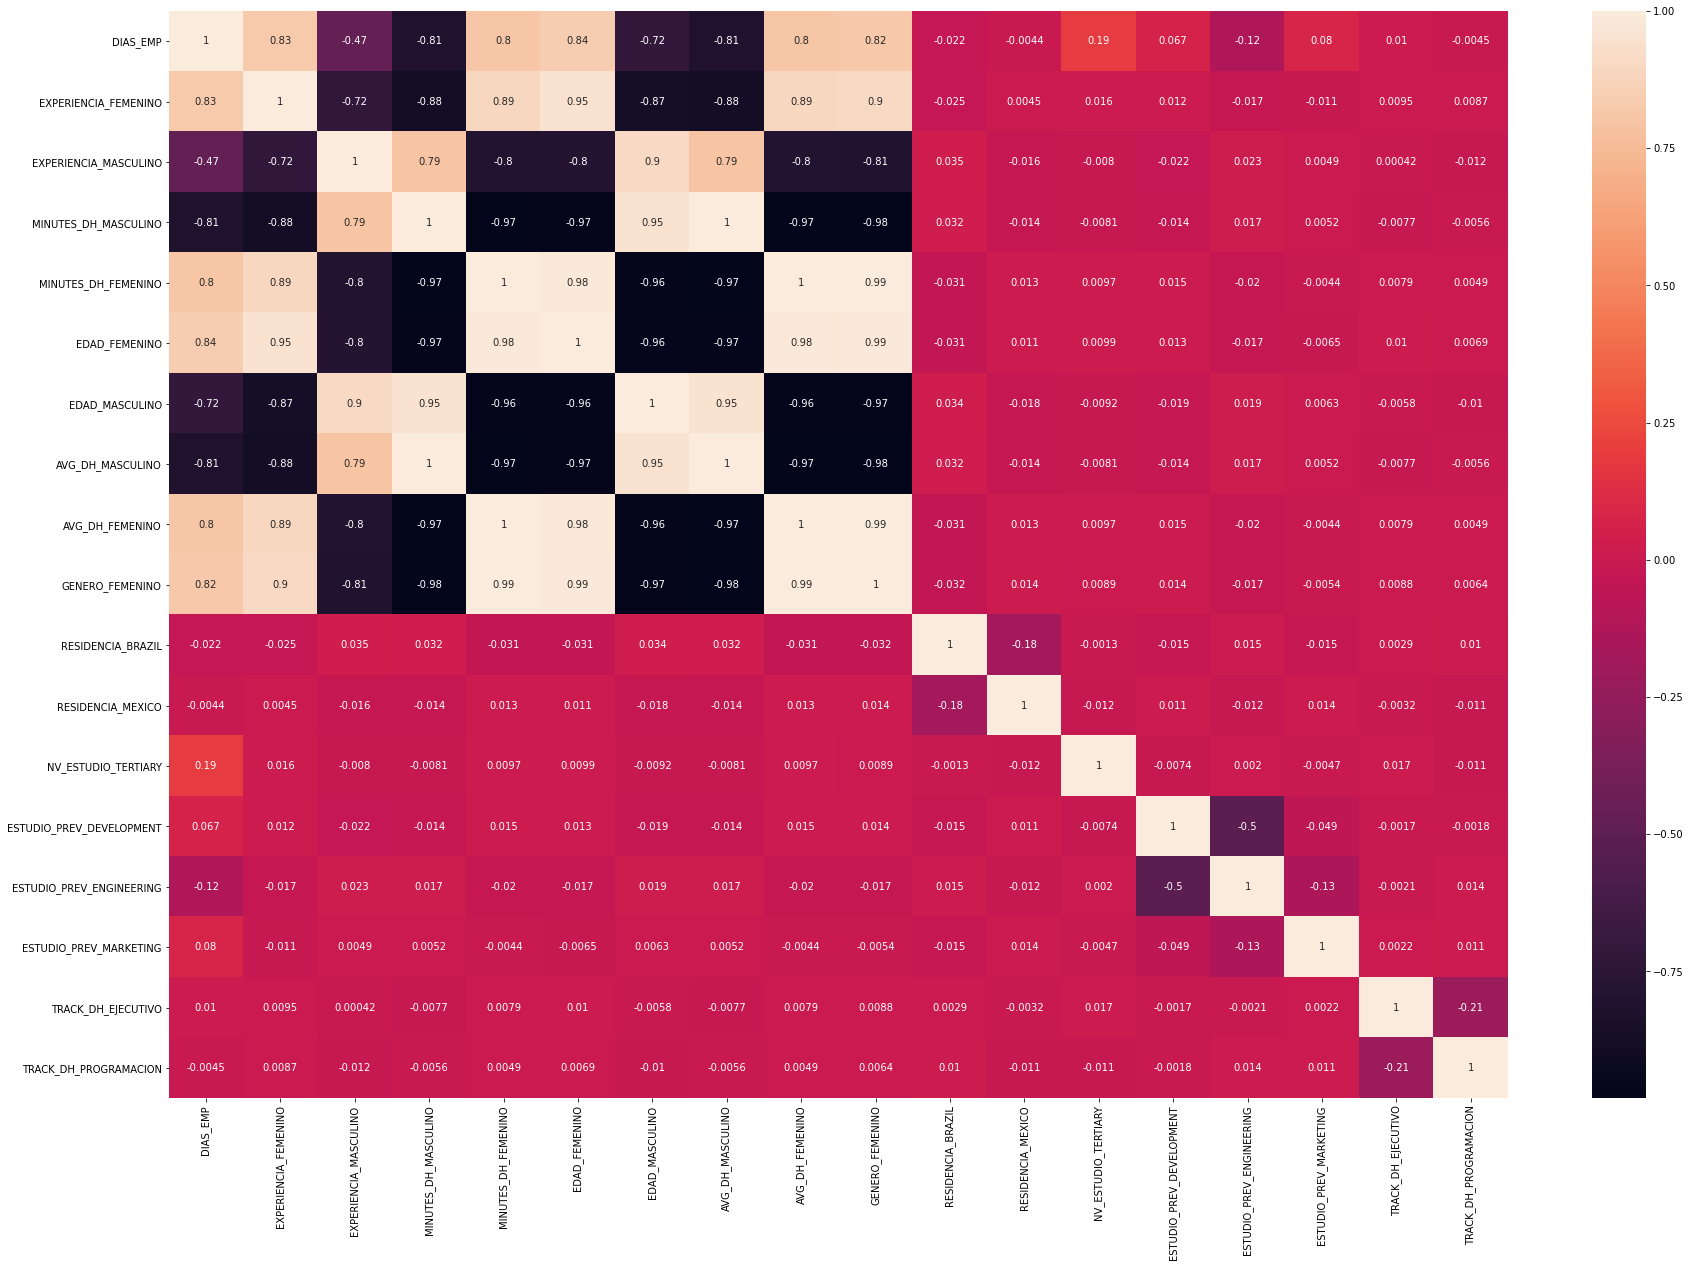

In [65]:
import seaborn as sn
corrMatrix3 = df_training_dataset_5.corr()
fig, ax = plt.subplots(figsize=(30,20))
sn.heatmap(corrMatrix3, annot=True)
plt.show()

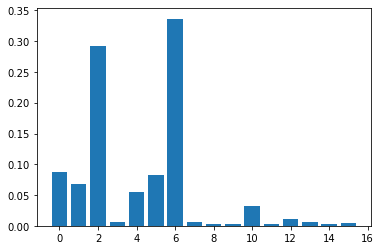

In [66]:
#otro analisis de feature importance para observar como influye las transformaciones que hemos realizado
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(oob_score = True,n_estimators=300, bootstrap = True, random_state = 42 )
#fit the model
features = df_training_dataset_5[['EXPERIENCIA_FEMENINO', 'EXPERIENCIA_MASCULINO',
       'MINUTES_DH_MASCULINO', 'MINUTES_DH_FEMENINO', 'EDAD_FEMENINO',
       'EDAD_MASCULINO', 'AVG_DH_MASCULINO', 'AVG_DH_FEMENINO',
       'RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 'NV_ESTUDIO_TERTIARY',
       'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
       'ESTUDIO_PREV_MARKETING', 'TRACK_DH_EJECUTIVO',
       'TRACK_DH_PROGRAMACION']]
target = df_training_dataset_5['DIAS_EMP']
model.fit(features,target)
# get importance
importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Seleccionando las columnas "features" y "target"

In [69]:
df_training_dataset_5.columns

Index(['DIAS_EMP', 'EXPERIENCIA_FEMENINO', 'EXPERIENCIA_MASCULINO',
       'MINUTES_DH_MASCULINO', 'MINUTES_DH_FEMENINO', 'EDAD_FEMENINO',
       'EDAD_MASCULINO', 'AVG_DH_MASCULINO', 'AVG_DH_FEMENINO',
       'GENERO_FEMENINO', 'RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO',
       'NV_ESTUDIO_TERTIARY', 'ESTUDIO_PREV_DEVELOPMENT',
       'ESTUDIO_PREV_ENGINEERING', 'ESTUDIO_PREV_MARKETING',
       'TRACK_DH_EJECUTIVO', 'TRACK_DH_PROGRAMACION'],
      dtype='object')

In [77]:
print(Counter(df_training_dataset_5['GENERO_FEMENINO']))

Counter({0: 5230, 1: 2390})


In [78]:
#Resampling de los datos de acuerdo a la cantidad de masculinos y femeninos en la columna genero
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
target = df_training_dataset_5['GENERO_FEMENINO']
features = df_training_dataset_5.drop(columns=['GENERO_FEMENINO'],inplace=False)

strategy = {0: 5230, 1: 3590}
over = RandomOverSampler(sampling_strategy=strategy)
# fit and apply the transform
features , target = over.fit_resample(features , target)

print(Counter(target))

Counter({0: 5230, 1: 3590})


In [79]:
target = features['DIAS_EMP']  ## NO CAMBIE EL NOMBRE DE LA VARIABLE "target".
features = features[
    [
        'EXPERIENCIA_FEMENINO', 'EXPERIENCIA_MASCULINO',
       'MINUTES_DH_MASCULINO', 'MINUTES_DH_FEMENINO', 'EDAD_FEMENINO',
       'EDAD_MASCULINO', 'AVG_DH_MASCULINO', 'AVG_DH_FEMENINO',
       'RESIDENCIA_BRAZIL', 'RESIDENCIA_MEXICO', 'NV_ESTUDIO_TERTIARY',
       'ESTUDIO_PREV_DEVELOPMENT', 'ESTUDIO_PREV_ENGINEERING',
       'ESTUDIO_PREV_MARKETING', 'TRACK_DH_EJECUTIVO',
       'TRACK_DH_PROGRAMACION']
]
print(features.columns)

Index(['EXPERIENCIA_FEMENINO', 'EXPERIENCIA_MASCULINO', 'MINUTES_DH_MASCULINO',
       'MINUTES_DH_FEMENINO', 'EDAD_FEMENINO', 'EDAD_MASCULINO',
       'AVG_DH_MASCULINO', 'AVG_DH_FEMENINO', 'RESIDENCIA_BRAZIL',
       'RESIDENCIA_MEXICO', 'NV_ESTUDIO_TERTIARY', 'ESTUDIO_PREV_DEVELOPMENT',
       'ESTUDIO_PREV_ENGINEERING', 'ESTUDIO_PREV_MARKETING',
       'TRACK_DH_EJECUTIVO', 'TRACK_DH_PROGRAMACION'],
      dtype='object')


In [80]:
class OutlierExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        print('init')

    def fit(self, X, Y):
        return self

    def transform(self, X, Y):
        # Primero copiamos el dataframe de datos de entrada 'X'
        X2 = X.to_numpy()
        Y2 = Y.to_numpy()
        iso = IsolationForest(n_estimators=200,contamination=0.2,random_state=42)
        yhat = iso.fit_predict(X)
        mask = yhat != -1
        X2, Y2 = X2[mask, :], Y2[mask]
        print(X2.shape)
        print(Y2.shape)
        X_train2 = pd.DataFrame.from_records(data=X2,columns=X.columns)
        Y_train2 = Y2

        return (X_train2, Y_train2)

In [81]:
print(features.shape)
outlier = OutlierExtractor()
outlier.fit(X=features, Y=target)
features, target = outlier.transform(X=features , Y=target)


(8820, 16)
init
(7056, 16)
(7056,)


In [82]:
sc = RobustScaler()

In [83]:
#En estas celdas a continuacion hice un analisis con varios modelos de regresion y el metodo de cross validation KFold para ver cual modelo se ajustaba mejor
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
pipeline_linear = Pipeline(steps=[('normalize', sc), ('model', linear)])
model_linear = TransformedTargetRegressor(regressor=pipeline_linear, transformer=sc)
forest = RandomForestRegressor(oob_score = True,n_estimators=300, bootstrap = True, random_state = 42 )
pipeline_forest = Pipeline(steps=[('normalize', sc), ('model', forest)])
model_forest = TransformedTargetRegressor(regressor=pipeline_forest, transformer=sc)

cv = KFold(n_splits=10, shuffle=True, random_state=42)

In [84]:
#Modelo con RandomForestRegressor
scores3 = cross_val_score(model_forest, features, target, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scoresa = absolute(scores3)
# summarize the result
s_mean = mean(scoresa)
print('Mean MAE: %.3f' % (s_mean))
print(scores3)

Mean MAE: 0.906
[0.90746824 0.90800028 0.91028406 0.90922718 0.89883586 0.90574849
 0.90014973 0.90024492 0.91154696 0.90901   ]


In [85]:
#Modelo con LinearRegressor
scores4 = cross_val_score(model_linear, features, target, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scoresa = absolute(scores4)
# summarize the result
s_mean = mean(scoresa)
print('Mean MAE: %.3f' % (s_mean))
print(scores4)

Mean MAE: 0.879
[0.88926382 0.88851936 0.87533782 0.88528723 0.87103044 0.87747987
 0.87574749 0.86579856 0.88337624 0.87492542]


In [86]:
#Elegimos el modelo con RandomForestRegressor
#y ahora volvemos a hacer el modelo sin el cross validation

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#definimos de nuevo los features y traget aplicando al mismo tiempo del scaler
features2 = pd.DataFrame.from_records(data=sc.fit_transform(features), columns=features.columns)
target2 = sc.fit_transform(np.array(target).reshape(-1,1))
#division en train y test
X_train, X_test, y_train, y_test = train_test_split(features2, target2.ravel(), test_size=0.3, random_state=42)
#modelo y predicion
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
print(forest.score(X_test,y_test))
print(forest.oob_score_)


0.0315102476625514
0.9048785530109846
0.8993560914623515


Esta fue mi solucion al desafio 8 de la Maraton Behind the Code IBM 2020.
Luego de obtener el modelo entrenado, para la entrega del desafio se tenia que evaluar ese modelo sobre un dataset de prueba diferente al usado en el entrenamiento y sobre el generar los resultados. para esto se tenia que hacer las transformaciones necesarias para tener el mismo tipo de datos de entrada.

<hr>